<a href="https://colab.research.google.com/github/darstech/ML-Foundation/blob/main/2_linear_algebra_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch;
import numpy as np;
import tensorflow as tf;

In [9]:
u = torch.tensor([2, 5, -3])
u

tensor([ 2,  5, -3])

In [4]:
B = torch.tensor([[2, 0, -1],
                  [-2, 3, 1],
                  [0, 4, -1]])
B

tensor([[ 2,  0, -1],
        [-2,  3,  1],
        [ 0,  4, -1]])

In [10]:
u2 = torch.tensor([0, -4, 6])
u2

tensor([ 0, -4,  6])

In [6]:
I = torch.tensor([[1,0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [11]:
torch.matmul(I, u)

tensor([ 2,  5, -3])

In [12]:
torch.matmul(B, u)

tensor([ 7,  8, 23])

In [13]:
torch.matmul(B, u2)

tensor([ -6,  -6, -22])

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [14]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [15]:
import matplotlib.pyplot as plt


In [16]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

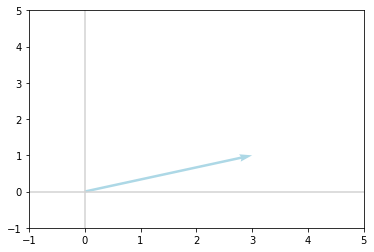

In [19]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [20]:
I = np.array([[1, 0],
              [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [22]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [23]:
v == Iv

array([ True,  True])

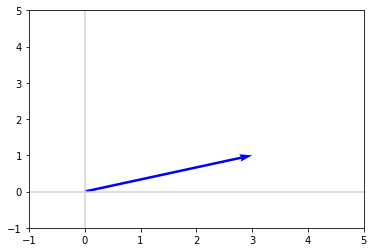

In [24]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [25]:
E = np.array([[1, 0],
              [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [26]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

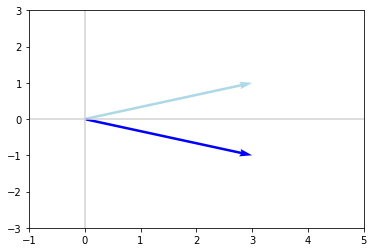

In [33]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [34]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [35]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

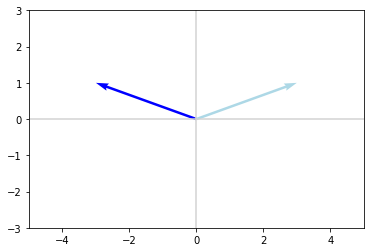

In [36]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-5, 5)
_ = plt.ylim(-3, 3)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 